In [11]:
# import library
import numpy as np
import csv
import matplotlib.pyplot as plt
from math import pi

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [12]:
#write a function that allows to load the data in the 35 files for each station
def loadData():
    df = pd.read_csv('cleaned_customized_daily_rainfall_data .csv')
    df = df[["StationIndex", "Year", "Month", "Day", "Rainfall"]]
    df = df.as_matrix()
    return df

# split data in training, validation and  testing data.
90% for training data

10% for testing data

In [13]:
def split_data_target():
    rainfalls = loadData()
    data = rainfalls
    target = rainfalls[:,4:]
    train_data,test_data, train_target, test_target = train_test_split(data, target, test_size=0.1, random_state=1)
    return train_data, train_target, test_data, test_target

In [14]:
train_data, train_target, test_data, test_target = split_data_target()
#train_target = train_target.reshape(1,35, 4820)
train_data.shape, train_target.shape, test_data.shape

((209250, 5), (209250, 1), (23250, 5))

R^2 score 0.9998436388072827
Variance 0.9998436569663264
Error 0.055154483211064566


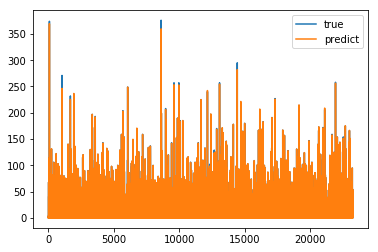

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
model = RandomForestRegressor(bootstrap=True,
                              max_depth= 100,
                              max_features= 3,
                              min_samples_leaf= 3,
                              min_samples_split= 8,
                              n_estimators= 1000)
X1 = train_data
y1 = train_target
y1 = y1.ravel()
Xtest = test_data
ytest = test_target
ytest =ytest.reshape(-1,1)
model.fit(X1,y1)
predict1 = model.predict(Xtest)
print('R^2 score' ,metrics.r2_score(ytest, predict1))
print('==============================')
print('Variance', metrics.explained_variance_score(ytest, predict1))
print('=================================')
print('Error', metrics.mean_squared_error(ytest, predict1))
print('===================================')
plt.plot(ytest)
plt.plot(predict1)
plt.legend(['true', 'predict'])
plt.show()
#print(metrics.accuracy_score(pred,test_target))
#X.shape, y.shape, X1.shape, y1.shape